# 3.MultiClass task-model 

### Import libraries
The required libraries for this notebook are pandas, sklearn, copy, numpy, pickle and matplotlib.




In [23]:
# import libraries
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn import svm
import joblib

### Load the data
We are going to use the Brain Tumors dataset 

In [24]:
data=pd.read_csv('./dataset/label.csv')
df0=pd.DataFrame(data)

In [25]:
Data_reduced=np.load('Data_reduced.npy')

In [26]:
Target=[]
for tumor in df0.label:
    if tumor == 'no_tumor':
        Target.append(0)
    elif tumor == 'meningioma_tumor':
        Target.append(1)
    elif tumor == 'glioma_tumor':
        Target.append(2)
    elif tumor == 'pituitary_tumor':
        Target.append(3)
Target = np.array(Target)
print(Target)

[1 0 1 ... 2 2 3]


0 represents no tumor     

1 represents meningioma_tumor

2 represents glioma_tumor

3 represents pituitary_tumor

In [27]:
counts=Counter(Target)
print(counts)# show the distribution of sample

Counter({2: 860, 1: 855, 3: 831, 0: 454})


### Shuffle and split the data into training and test set

In [28]:
Values= Data_reduced.copy()

In [29]:
Values, Target = shuffle(Values,Target)
x_Train, x_Test, y_Train, y_Test = train_test_split(Values, Target, train_size=0.8, random_state=0)

In [30]:
print(x_Train.shape, x_Test.shape, len(y_Train), len(y_Test))

print('Train set: {}  | Test set: {}'.format(round(((len(y_Train)*1.0)/len(Values)),3),
                                                       round((len(y_Test)*1.0)/len(Values),3)))

(2400, 839) (600, 839) 2400 600
Train set: 0.8  | Test set: 0.2


In [31]:
# Pre-process data
scaler = MinMaxScaler() 
x_Train1 = scaler.fit_transform(x_Train)
x_Test1 = scaler.transform(x_Test)
scaler = StandardScaler()
x_Train2 = scaler.fit_transform(x_Train)
x_Test2 = scaler.transform(x_Test)

> Scaling the data with MinMaxScaler or StandartScaler can basically get ready the data for the Machine Learning algorithm which can help converging.

### 1. Support Vector Machine (SVM)

In [33]:
def img_SVM(x_Train, y_Train, x_Test, y_Test):
    SVM_class = svm.SVC(kernel='rbf')

    SVM_class.fit(x_Train, y_Train)

    pred_SVM = SVM_class.predict(x_Test)
    joblib.dump(SVM_class, './model/SVM_multiple.m')
    print(pred_SVM)

    print("Support Vector Machine Accuracy:", accuracy_score(y_Test, pred_SVM))
    return pred_SVM
pred_SVM=img_SVM(x_Train, y_Train, x_Test, y_Test)

[1 0 1 2 2 1 0 1 1 0 1 3 2 2 2 2 0 3 3 2 1 2 1 1 3 0 1 3 1 1 2 3 1 2 3 3 1
 3 0 0 2 3 0 0 3 0 3 3 1 2 1 2 3 3 1 3 2 3 1 2 3 1 1 1 2 3 0 2 1 1 0 2 1 1
 3 3 3 2 3 0 2 3 0 0 2 2 3 3 3 2 0 0 1 1 3 1 1 3 1 2 1 1 2 2 1 3 2 1 2 2 2
 1 1 0 0 2 1 1 2 3 1 2 3 2 1 3 3 1 3 1 1 0 3 3 0 3 1 1 0 3 3 3 2 2 1 0 3 0
 0 2 1 2 2 1 1 1 2 3 2 2 2 1 3 2 3 3 0 3 3 1 2 3 3 0 3 3 2 0 2 2 3 3 0 0 3
 0 1 3 1 0 3 3 2 3 3 2 2 2 3 1 3 1 3 1 3 2 2 1 1 1 2 3 3 2 0 0 2 2 2 0 1 0
 1 3 1 1 3 3 3 0 3 3 3 1 3 2 2 0 1 3 2 1 1 3 2 2 2 0 3 1 3 1 2 2 3 2 3 3 2
 3 2 1 3 3 0 3 2 3 3 1 1 2 3 1 0 2 2 2 3 1 3 3 1 3 3 3 3 3 2 1 1 0 2 0 1 1
 1 2 0 1 0 0 2 3 1 2 1 3 1 0 0 3 1 2 3 3 2 2 2 2 3 3 3 1 3 0 3 2 1 0 1 1 0
 0 2 3 3 2 1 2 1 3 0 3 3 2 3 3 1 2 0 1 2 3 2 2 2 2 1 2 0 0 3 0 2 3 1 3 0 1
 3 1 3 2 1 3 3 1 3 2 0 1 1 3 3 2 3 1 2 1 1 3 2 3 1 1 3 0 1 2 2 2 1 3 2 1 1
 3 1 1 3 0 1 2 0 0 2 3 1 1 2 2 3 3 1 3 2 1 1 2 3 3 2 1 3 3 1 1 1 1 2 0 2 1
 2 1 1 3 2 3 2 1 1 1 3 3 0 3 2 2 2 3 2 1 1 1 3 1 1 2 1 2 1 0 2 3 2 3 1 2 1
 1 1 1 2 2 0 2 1 3 1 2 3 

In [34]:
SVM = joblib.load('./model/SVM_multiple.m')

In [35]:
Test_Proportion=Counter(y_Test)
print(Test_Proportion)

Counter({2: 186, 3: 172, 1: 162, 0: 80})


In [36]:
SVM_Proportion=Counter(pred_SVM)
print(SVM_Proportion)

Counter({3: 183, 1: 172, 2: 168, 0: 77})


In [37]:
Compare={'Target':Test_Proportion,'SVM':SVM_Proportion}
Com_table=pd.DataFrame(Compare)
Com_table

,Target,SVM
1,162,172
0,80,77
2,186,168
3,172,183


## !!!!Contents below don't included in the paper!!!!

In [35]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

### 2.Logistic Regression

In [38]:
def logRegrPredict(x_Train, y_Train,x_Test ):
    # Build Logistic Regression Model
    log_reg = LogisticRegressionCV(max_iter = 500)
    # Train the model using the training sets
    log_reg.fit(x_Train, y_Train)
    y_pred= log_reg.predict(x_Test)
    return y_pred

y_pred_logRegr = logRegrPredict(x_Train2, y_Train,x_Test2)
print(y_pred_logRegr)
# By definition a confusion matrix C is such that C_{i,j} 
# is equal to  group the number of observations
#  known to be in i and predicted to be in group j.
print(confusion_matrix(y_Test, y_pred_logRegr))
print('Logistic Regression Accuracy on test set: '+str(accuracy_score(y_Test,y_pred_logRegr)))
print(classification_report(y_Test,y_pred_logRegr))

D:\ProgramData\Anaconda3\envs\Assign\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\ProgramData\Anaconda3\envs\Assign\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

[1 2 1 0 0 3 3 2 1 2 2 2 0 3 3 2 0 0 2 3 2 1 2 0 3 1 1 3 3 2 2 3 0 0 1 1 1
 2 0 2 3 3 3 1 0 1 1 3 1 3 3 1 3 2 2 3 1 1 2 3 1 2 2 2 0 1 2 0 1 1 2 3 1 2
 2 1 1 0 1 3 3 2 0 1 3 2 1 3 1 2 2 3 3 3 0 2 1 2 2 1 3 3 2 2 3 3 3 3 0 3 3
 1 1 0 3 2 3 1 1 3 3 3 2 0 2 2 1 1 0 3 1 3 0 1 3 2 0 3 2 1 1 2 1 1 3 1 0 3
 1 1 0 2 3 3 3 1 3 0 3 1 1 1 2 1 1 1 2 1 1 0 0 2 3 2 3 0 2 1 1 3 1 2 0 1 2
 2 1 3 0 3 3 0 0 3 1 3 2 2 3 2 3 2 3 2 2 3 3 3 3 2 2 1 3 2 3 1 2 2 3 1 1 2
 1 1 0 3 3 2 1 2 1 2 3 0 2 2 1 3 1 1 3 0 2 1 0 3 2 2 1 2 2 2 3 0 1 2 2 1 2
 2 3 2 2 0 2 1 1 1 3 3 2 3 1 2 1 3 2 3 3 1 2 3 2 1 0 0 2 2 0 3 3 3 1 0 3 2
 2 3 3 0 0 1 1 2 3 3 0 3 1 3 3 1 1 2 1 1 3 2 1 2 3 2 1 3 1 2 0 2 2 3 3 0 2
 1 1 0 1 2 0 2 1 3 0 1 1 1 2 0 3 2 3 2 1 3 1 3 3 2 1 2 3 3 1 3 3 3 0 2 0 3
 0 3 1 2 3 2 2 2 3 2 1 2 3 2 2 0 2 1 2 2 2 3 1 1 1 2 3 1 2 3 3 0 3 2 2 1 1
 3 2 0 2 1 2 2 2 3 1 2 2 1 2 3 2 3 2 0 2 2 3 2 1 1 2 1 0 3 1 2 3 1 3 3 0 2
 2 1 2 2 0 0 2 3 3 1 1 1 1 1 0 1 2 0 2 1 2 1 2 2 3 2 3 2 2 3 0 3 0 1 2 2 2
 1 1 1 0 3 1 2 2 3 1 3 1 

### 3.K-Nearest Neighbours

In [17]:
def KNNClassifier(X_Train, y_Train, X_Test,k):

    #Create KNN object with a K coefficient
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_Train, y_Train) # Fit KNN model


    Y_pred_KNN = neigh.predict(X_Test)
    return Y_pred_KNN

In [18]:
score_list=[]

for i in range(1,36):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_Train,y_Train)
    pred_i_KNN  = knn.predict(x_Test)
    score_list.append(metrics.accuracy_score(y_Test,pred_i_KNN ))

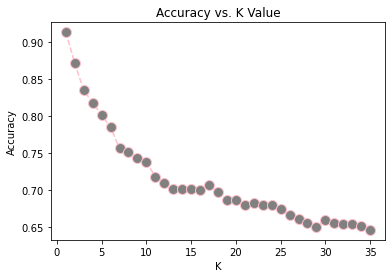

In [19]:
plt.plot(range(1,36),score_list,color='pink', linestyle='dashed', marker='o', markerfacecolor='grey',markersize=10)
plt.title("Accuracy vs. K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

In [20]:
#high_score=score_list.index(np.max(score_list))+1

In [21]:
y_pred_KNN = KNNClassifier(x_Train2, y_Train, x_Test2,1)

score=metrics.accuracy_score(y_Test,y_pred_KNN)
print('K-Nearest Neighbours Accuracy on test set:',score)

K-Nearest Neighbours Accuracy on test set: 0.795


### 4.Decision Tree 

In [22]:
#Importing the Decision tree classifier from the sklearn library.
tree_params={
    'criterion':'entropy'
}
DT = tree.DecisionTreeClassifier( **tree_params )
DT.fit(x_Train,y_Train)
y_pred_tree =  DT.predict(x_Test)


print('Decision Tree Accuracy Score on train data: ', accuracy_score(y_true=y_Train, y_pred=DT.predict(x_Train)))
print('Decision Tree Accuracy Score on test data: ', accuracy_score(y_true=y_Test, y_pred=y_pred_tree))

Decision Tree Accuracy Score on train data:  1.0
Decision Tree Accuracy Score on test data:  0.7133333333333334


In [23]:
# list=range(values.shape[1])
# it=iter(list)
# feature_names=np.fromiter(it, dtype=float)
# class_names=np.array(['NO_Tumor', 'Tumor'], dtype='<U10')

In [24]:
#  def visualise_tree(tree_to_print):
#     plt.figure()
#     fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=800)
#     tree.plot_tree(tree_to_print,feature_names,class_names,filled = True,rounded=True);
#     plt.show()
# visualise_tree(clf)


In [25]:
tree_params={
    'criterion': 'entropy',
    'min_samples_split':30
}
lf = tree.DecisionTreeClassifier(**tree_params)
DT.fit(x_Train, y_Train)
print('Accuracy Score on train data: ', accuracy_score(y_true=y_Train, y_pred=DT.predict(x_Train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_Test, y_pred=DT.predict(x_Test)))

Accuracy Score on train data:  1.0
Accuracy Score on the test data:  0.7166666666666667


### 5. Ensemble Methods

In [26]:
def baggingClassifierML(X_train, y_train, X_test,k):

    bagmodel=BaggingClassifier(n_estimators=k,max_samples=0.5, 
                               bootstrap=True,n_jobs= -1,random_state=1)
    bagmodel.fit(X_train, y_train) 

    Y_pred = bagmodel.predict(X_test)
    return Y_pred

In [ ]:
Y_pred_bagging=baggingClassifierML(x_Train, y_Train, x_Test,10)
score_bagging=metrics.accuracy_score(y_Test,Y_pred_bagging)
print(score_bagging)

In [ ]:
def boostingClassifierML(x_train, y_train, x_test,k):
    # AdaBoost takes Decision Tree as its base-estimator model by default.
    boostmodel=AdaBoostClassifier(n_estimators=k,algorithm='SAMME.R',learning_rate=0.5)
    boostmodel.fit(x_train , y_train,sample_weight=None) # Fit KNN model


    Y_pred = boostmodel.predict(x_test)
    #print (Y_pred)
    return Y_pred

In [ ]:
score_list=[]

for i in range(1,25):
    Y_pred_boosting_i=boostingClassifierML(x_Train2, y_Train, x_Test2, i)
    score_list.append(metrics.accuracy_score(y_Test,Y_pred_boosting_i))

In [ ]:
plt.plot(range(1,25),score_list,color='pink', linestyle='dashed', marker='o', markerfacecolor='grey',markersize=10)
plt.title("Accuracy vs. K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
#high_score=score_list.index(np.max(score_list))+1

In [ ]:
Y_pred_boosting=boostingClassifierML(x_Train2, y_Train, x_Test2, 200)
score_boosting=metrics.accuracy_score(y_Test,Y_pred_boosting)
print(score_boosting)